Провести крос-валідацію для моделі, побудованої на основі датафрейму student_scores з попереднього завдання.
Обгрунтувати обраний метод крос-валідації.

In [11]:
import pandas as pd

# Завантаження даних з файлу
df = pd.read_csv('student_scores.csv')

df.columns = ['hours', 'scores']  # присвоєння імен ознакам

df

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# розділяємо дані на залежну (y) та незалежну (x) змінні
x = df['hours']
x_array = np.array(x).reshape(-1, 1)

y = df['scores']
y_array = np.array(y).reshape(-1, 1)

# розділяємо дані на тренувальну та тестову вибірки
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.2, random_state=0)

# створюємо модель лінійної регресії
model = LinearRegression()

# навчаємо модель на тренувальних даних
model.fit(x_train, y_train, sample_weight=None)

# зробимо передбачення на тестових даних
y_pred = model.predict(x_test)

# виведення результату фітингу моделі лінійної регресії на тестових даних
print('Predictions:', y_pred)

# оцінюємо якість моделі за допомогою метрик R2 та MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 scores:', r2)
print('Mean squared error:', mse)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Predictions: [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]
R2 scores: 0.9454906892105356
Mean squared error: 21.5987693072174
(20, 1)
(5, 1)
(20, 1)
(5, 1)


Значення R2, в діапазоні від 0 до 1, де значення 1 означає ідеальну прогнозуючу здатність моделі, а значення 0 означає, що модель не може пояснити варіацію відповідної залежної змінної.
MSE вимірює середньоквадратичну помилку передбачень моделі. Чим менше значення MSE, тим краще модель.

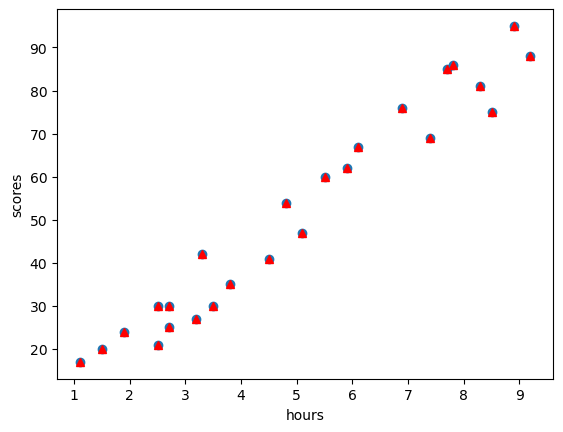

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x_array, y_array, 'r^')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

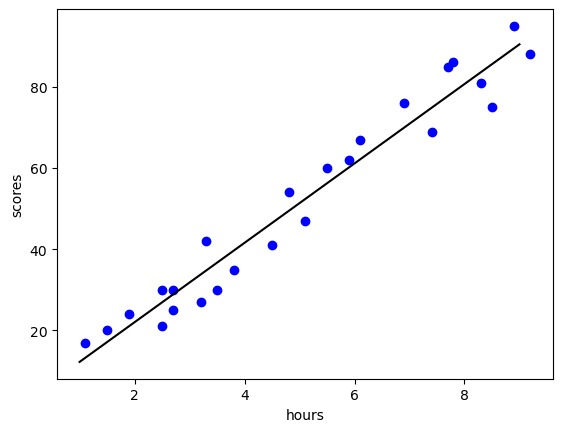

In [14]:
# побудова графіку
LinReg = LinearRegression().fit(df[['hours']], df['scores'])
b, m = LinReg.intercept_, LinReg.coef_
m = m[0]

plt.scatter(df.hours, df.scores, color='blue')
plt.plot(list(range(1, 10)), [m * x + b for x in range(1, 10)], color='black')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# створюємо модель лінійної регресії
model = LinearRegression()

# оцінюємо якість моделі за допомогою 5-fold крос-валідації
scores = cross_val_score(model, x_array, y_array, cv=5, scoring='r2')

print('R2 scores:', scores)
print('Mean R2 score:', scores.mean())


R2 scores: [0.78626426 0.97891923 0.93182467 0.96604831 0.9273292 ]
Mean R2 score: 0.9180771341891049


У даному випадку використовуємо 5-fold крос-валідацію та метрику R2 для оцінки якості моделі.
Метод cross_val_score() повертає серію значень R2 для кожної ітерації крос-валідації та середнє значення R2 для всіх ітерацій.
Так отримаємо більш точну оцінку якості моделі і переконаємось, що наша модель і не перенавчена і недонавчена.